In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv("/content/unemployment.csv")
print("data has been successfully loaded")

data has been successfully loaded


In [15]:

data


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [17]:
data.shape

(267, 9)

In [18]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [19]:

print(data.isnull().sum())


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


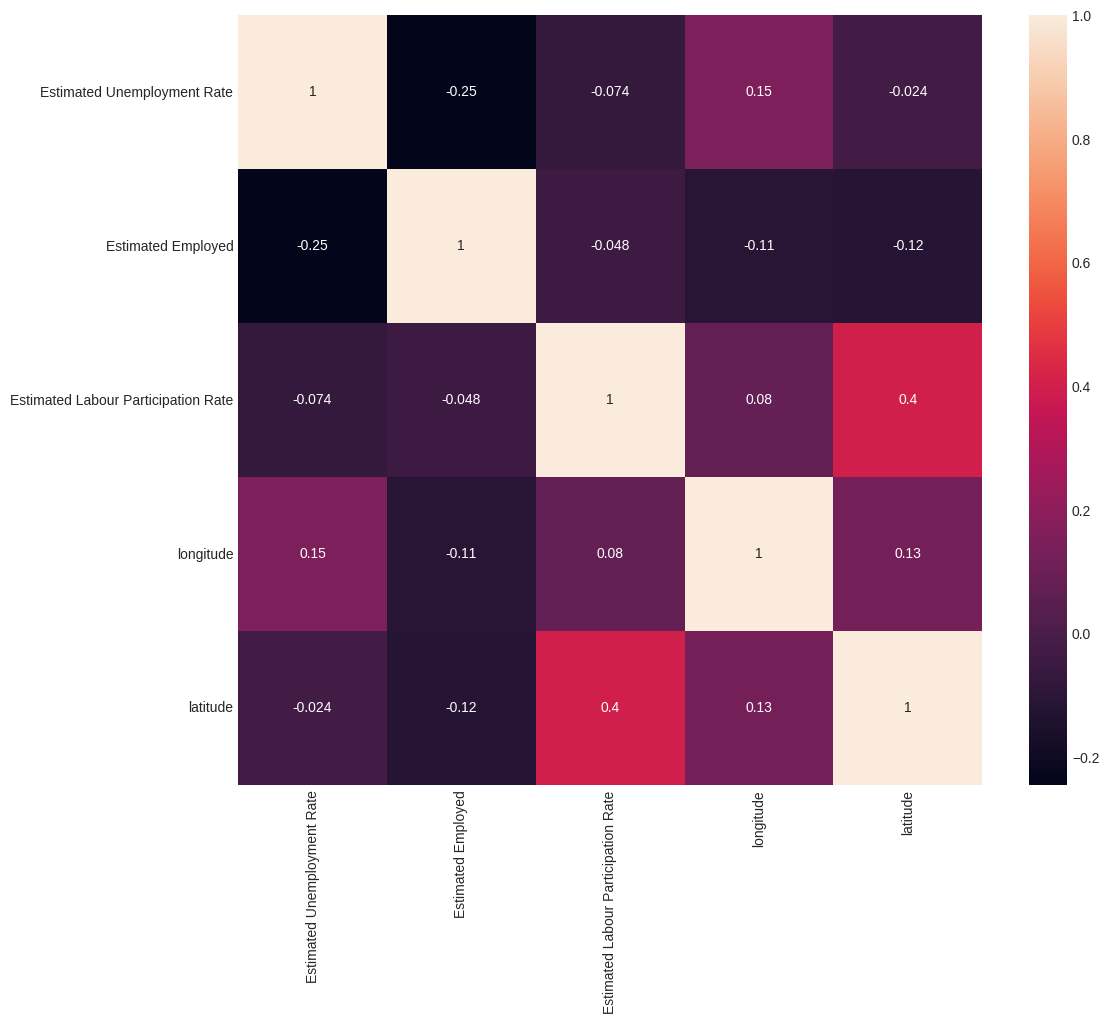

In [22]:

data_numeric = data.select_dtypes('number')


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric.corr(), annot=True)
plt.show()


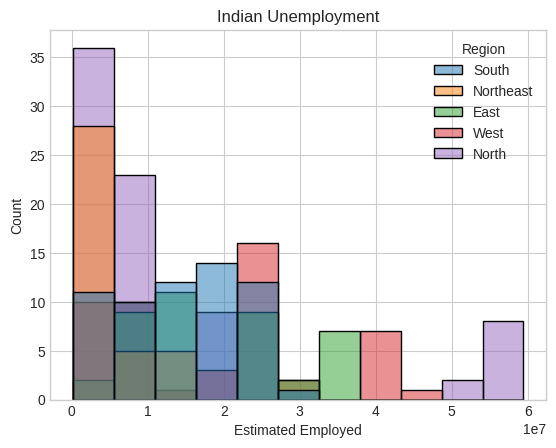

In [23]:
data.columns= ["States","Date","Frequency",
 "Estimated Unemployment Rate","Estimated Employed",
 "Estimated Labour Participation Rate","Region",
 "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

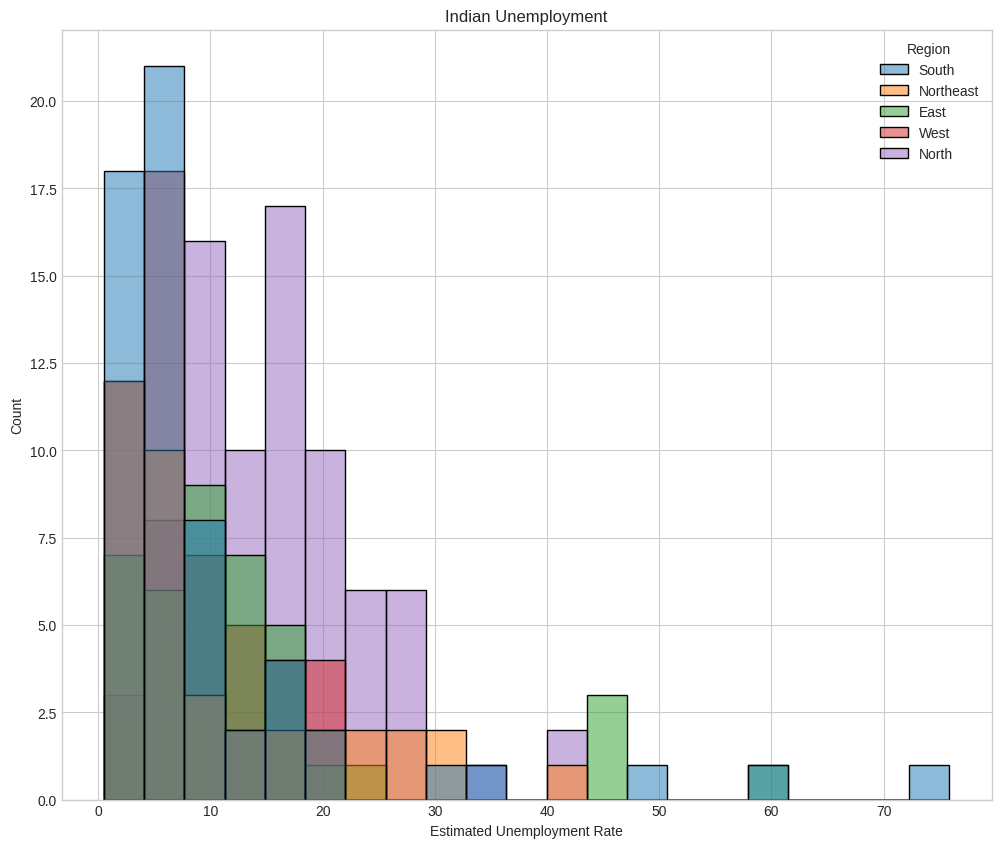

In [24]:

plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

In [26]:
unemploment = data[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"],
 values="Estimated Unemployment Rate",
 width=700, height=700, color_continuous_scale="RdY1Gn",
 title="Unemployment Rate in India")
figure.show()

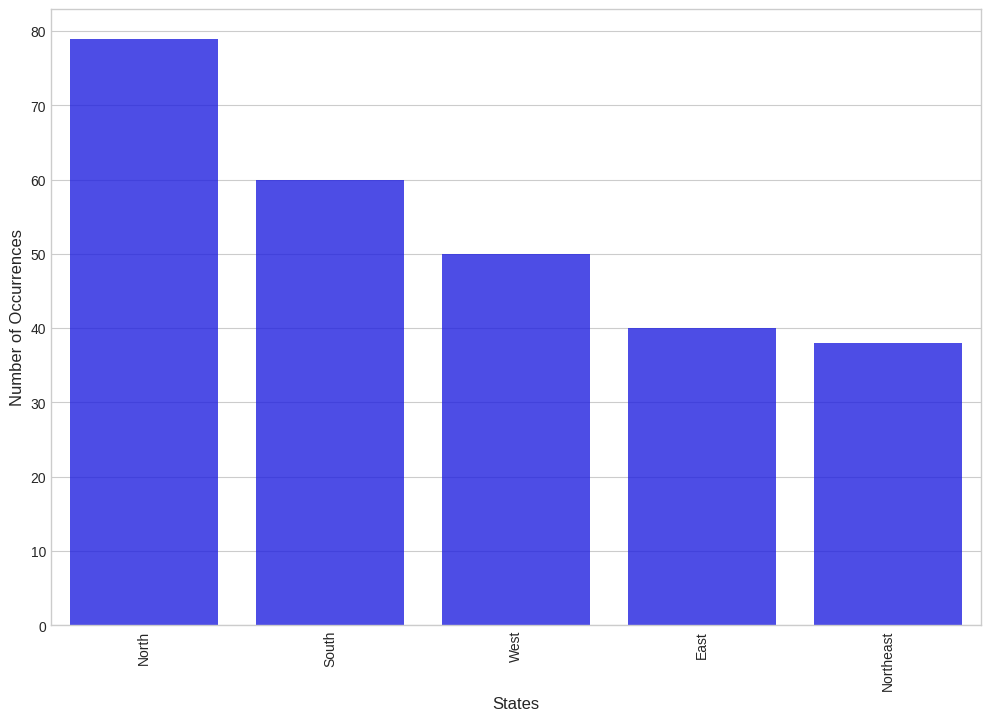

In [28]:
# Create Bar Plot
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color='blue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


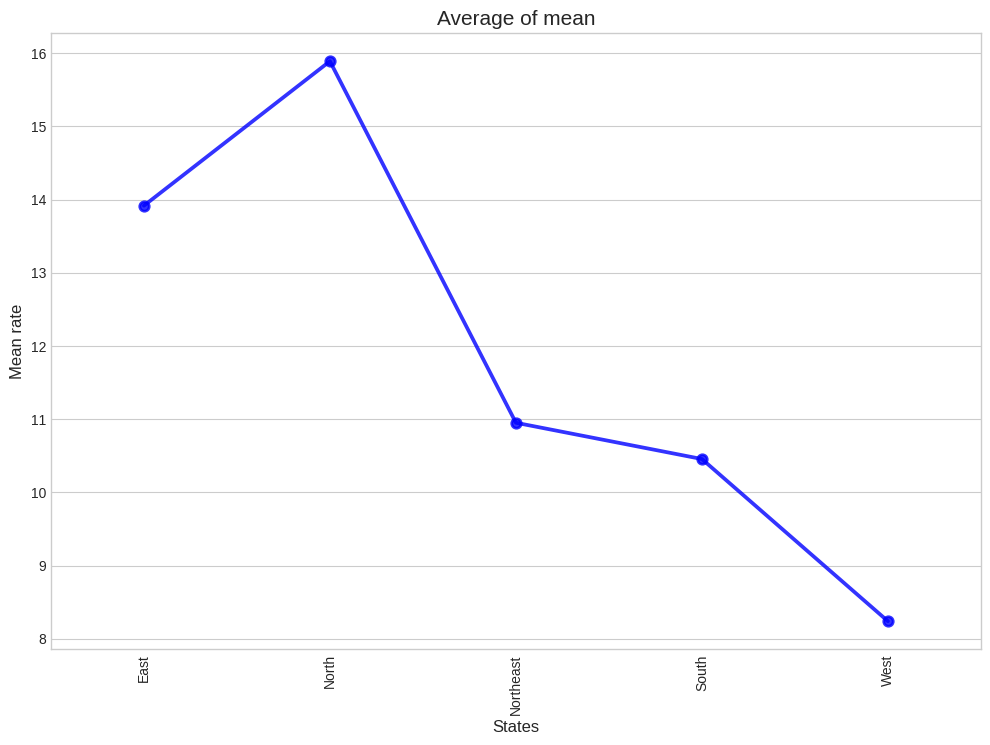

In [30]:
grouped_df = data.groupby(["Region"])["Estimated Unemployment Rate"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.pointplot(x='Region', y='Estimated Unemployment Rate', data=grouped_df, alpha=0.8, color='blue')
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


In [31]:

data.Region.nunique()


5

In [32]:
make_total = data.pivot_table("Estimated Unemployment Rate",index=['Region'],aggfunc='mean')
topstate=make_total.sort_values(by='Estimated Unemployment Rate',ascending=False)[:47]
print(topstate)


           Estimated Unemployment Rate
Region                                
North                        15.889620
East                         13.916000
Northeast                    10.950263
South                        10.454667
West                          8.239000


In [33]:
maketotal_1 = data.pivot_table(values='Estimated Unemployment Rate',index=['Region'],aggfunc=np.std)
df1 = maketotal_1.reset_index().dropna(subset=['Estimated Unemployment Rate'])
df2 = df1.loc[df1.groupby('Region')['Estimated Unemployment Rate'].idxmax()]
for index,row in df2.iterrows():
 print(row['Region'],"Region which",row['Region'],"has the highest yearly fluncation.")

East Region which East has the highest yearly fluncation.
North Region which North has the highest yearly fluncation.
Northeast Region which Northeast has the highest yearly fluncation.
South Region which South has the highest yearly fluncation.
West Region which West has the highest yearly fluncation.
